#### The model will be implementing the K-Means Clustering Algorithm
#### This algorithm is used in unsupervised problems. Unsupervises problems have no external classifcations (labels).
The dataset for this model has beent taken from [Kaggle](https://www.kaggle.com/aamirsiddiqui/50startup)

The inputs taken for this model are  **Administration** and **Profits** of different startup companies.

In [1]:
#Importing the important libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let us import the dataset. 

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head(5)

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


Let us assign the inputs:

In [3]:
X = dataset.iloc[ : , [ 2 , 5 ] ]

In [4]:
X.head(5)

,Administration,Profit
0,136897.80,192261.83
1,151377.59,191792.06
2,101145.55,191050.39
3,118671.85,182901.99
4,91391.77,166187.94


Let us plot a scattered graph for the inputs:

Text(0, 0.5, 'Profits')

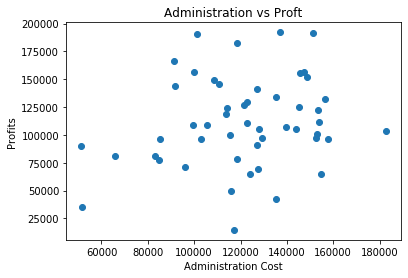

In [5]:
plt.scatter(X.iloc[ : , 0 ] , X.iloc[ :  , 1])
plt.title("Administration vs Proft")
plt.xlabel("Administration Cost")
plt.ylabel("Profits")

The intuition behind the K-Means Clustering algorithm is to assign centroids to each cluster of inputs to determine which cluster does the new  data belong to. This is done by measuring the Euclid's distance between the new data point and the all the centroids. The centroid which is closest to the new data point takes the data point under it's cluster. 

The optimized number of clusters is determined by using the **Elbow Method** which is demonstrated below. 

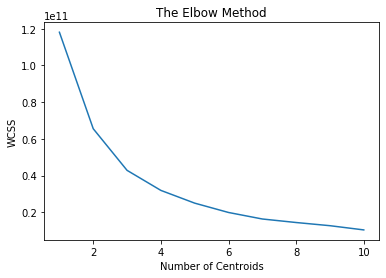

In [6]:
#importing the Scikit Learn KMeans model:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kMeans.fit(X)
    wcss.append(kMeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Centroids')
plt.ylabel('WCSS')
plt.show()

As we can see from the graph above that the optimized number of centroid we should use are 4.

In [7]:
kMeans = KMeans(n_clusters = 4, init = 'k-means++')
yKMeans = kMeans.fit_predict(X)

Since the indexing in python starts from 0 the n_cluster ranges from 0 to 3 for 4 clusters as seen below

In [8]:
yKMeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 0, 3, 3, 0,
       0, 0, 0, 0, 3, 0])

In [9]:
X = X.values 

In [10]:
#Evaluating the centroid values:
kMeans.cluster_centers_

array([[127587.78      ,  54979.59714286],
       [136892.52952381, 111895.74190476],
       [121471.64769231, 163615.31076923],
       [ 80026.99777778,  82107.24      ]])

Let us visualize what the K-Means clustering model looks like on the graph.  Since the indexing starts from 0 the 4 clusters will range from  0 to 3 (including 0 and 3). 

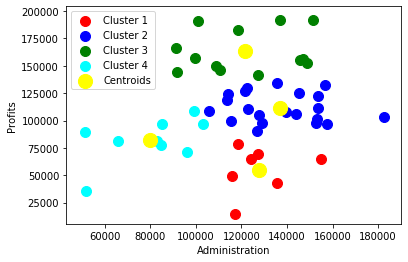

In [11]:
plt.scatter(X[yKMeans == 0 , 0] , X[yKMeans == 0 , 1 ] , s = 100 , c = 'red' , label = 'Cluster 1')
plt.scatter(X[yKMeans == 1 , 0] , X[yKMeans == 1 , 1 ] , s = 100 , c = 'blue' , label = 'Cluster 2')
plt.scatter(X[yKMeans == 2 , 0] , X[yKMeans == 2 , 1 ] , s = 100 , c = 'green' , label = 'Cluster 3')
plt.scatter(X[yKMeans == 3 , 0] , X[yKMeans == 3 , 1 ] , s = 100 , c = 'cyan' , label = 'Cluster 4')

#Plotting the centroid for each cluster:
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

plt.xlabel("Administration")
plt.ylabel("Profits")
plt.legend()

As we can see we have successfully executed the K-Means Clustering algorithm. This might not be the best case sceanrio but has given us some pretty decent results. 